In [28]:
%pylab inline
import scipy.integrate
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# One Step Solution

In [50]:
def dx_dt(x, t, beta, alpha):
    return beta - alpha * x

### set parameters

In [53]:
# time points
t = linspace(0, 100, 1000)

# parameters
BETA = 0.1
ALPHA = 0.1

# initial values
x_0 = 0

# steady state
xs = BETA/ALPHA

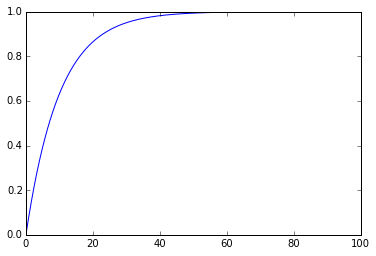

In [54]:
# one step solution
Y = scipy.integrate.odeint(dx_dt, x_0, t, args = (BETA, ALPHA))
plot(t, Y)

### Solve the ODE numerically with different initial values

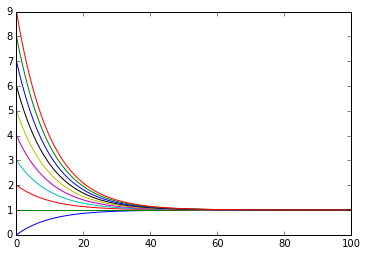

In [68]:
fig, ax = plt.subplots(1, 1)
for x_0 in range(0, 10):
    Y = scipy.integrate.odeint(dx_dt, x_0, t, args = (BETA, ALPHA))
    ax.plot(t, Y)

### Analytical Solution of one step ODE

In [13]:
def solvef(t, x_0, BoverA, alpha):
    return BoverA - (BoverA - x_0) * e**(-alpha * t)

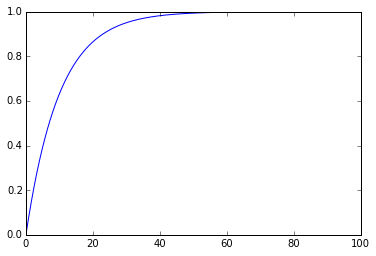

In [15]:
BETAoverALPHA = 1
ALPHA = 0.1
x0 = 0
t = linspace(0, 100, 1000)

x = solvef(t, x0, BETAoverALPHA, ALPHA)

plot(t, x)

### Plot the solution with different BETA/ALPHA   
Steady State Concentration = production rate (BETA) / degradation rate (ALPHA)

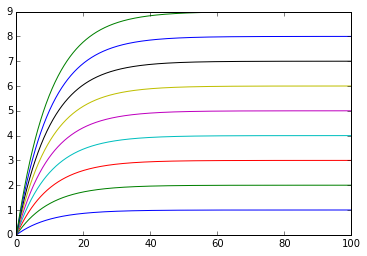

In [17]:
for BoA in range(1, 10):
    plot(t, solvef(t, x0, BoA, ALPHA))

### Plot the solution with different ALPHA 
ALPHA = degradation rate

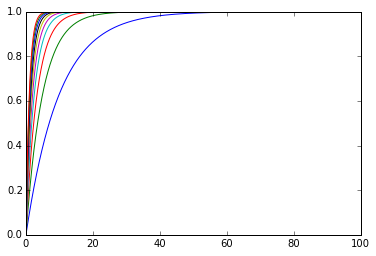

In [20]:
for alpha in np.linspace(0.1, 1, 10):
    plot(t, solvef(t, x0, BETAoverALPHA, alpha))

# Two Steps Model

In [13]:
def dX_dt(X, t=0, betam=0, betap=0, alpham=0, alphap=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ betam        - alpham * X[0],
                   betap * X[0] - alphap * X[1] ])

### Set Parameters

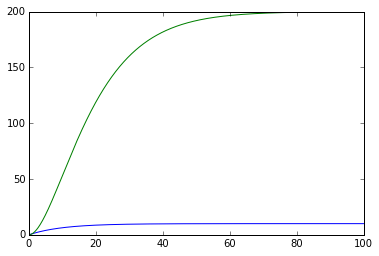

In [74]:
# time points
t = linspace(0, 100, 1000)

# two steps
BETAm = 1
ALPHAm = 0.1

BETAp = 2
ALPHAp = 0.1

# initial values
X0 = array([0, 0])

# steady state
Xs = array([BETAm/ALPHAm, BETAp*BETAm/ALPHAp/ALPHAm])

# two step solution
X = scipy.integrate.odeint(dX_dt, X0, t, args = (BETAm, BETAp, ALPHAm, ALPHAp))

# plot
f, ax = plt.subplots(1, 1)
ax.plot(t, X[:,0])
ax.plot(t, X[:,1])

# Compare One-Step and Two-Step Model

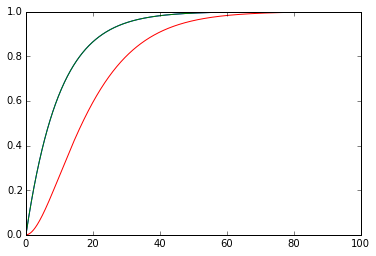

In [80]:
# time points
t = linspace(0, 100, 1000)

################################################
# one step parameters
BETA = 0.5
ALPHA = 0.1

# initial values
y_0 = 0

# steady state
ys = BETA/ALPHA

################################################
# two steps parameters
BETAm = 0.5
ALPHAm = 0.1

BETAp = 0.5
ALPHAp = 0.1

# initial values
X0 = array([0, 0])

# steady state
Xs = array([BETAm/ALPHAm, BETAp*BETAm/ALPHAp/ALPHAm])

################################################

# one step solution
Y = scipy.integrate.odeint(dx_dt, y_0, t, args = (BETA, ALPHA))

# two step solution
X = scipy.integrate.odeint(dX_dt, X0, t, args = (BETAm, BETAp, ALPHAm, ALPHAp))

# plot
f, ax = plt.subplots(1, 1)
ax.plot(t, Y/ys)
ax.plot(t, X[:,0]/Xs[0])
ax.plot(t, X[:,1]/Xs[1])

Note:  

If the concentration of mRNA raise to the steady state quicker by increasing the rate of the degradation, then the one step model and two step model could be compared each other.